In [1]:
import requests
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join

In [2]:
# Where my json files are located
player_name = "Emil"
#player_name = "Liam"
onlyfiles = [f for f in listdir(f"../{player_name}FaceitData/MatchStats") if isfile(join(f"../{player_name}FaceitData/MatchStats", f))]

In [4]:
#Rename columns
def rename_cols(text: str):
    text = text.split(".")[1]
    text = text.split(" ")
    text = "".join(list(map(str.capitalize, text)))
    return text

In [5]:
def create_df_from_json():
    df = pd.DataFrame()
    for ID in onlyfiles:
        path = f"../{player_name}FaceitData/MatchStats/{ID}"
        #print(path)
        with open(path, "r") as file:
           obj = json.load(file)["items"]
           obj = pd.json_normalize(obj)
        obj = obj.rename(columns=rename_cols)
        df = pd.concat([df, obj], ignore_index=True)
    return df


In [6]:
df_emil = create_df_from_json()
#df_liam = create_df_from_json()

In [7]:
# Create picklle file if there are large amounts of json files
df_emil.to_pickle(f"{player_name}Stats.pkl", compression="bz2")

In [2]:
df_emil = pd.read_pickle("EmilStats.pkl", compression="bz2")

In [3]:
df_emil

,MatchId,MatchRound,Team,QuadroKills,Score,PentaKills,Headshots,GameMode,Result,OvertimeScore,...,Deaths,FinalScore,K/dRatio,Headshots%,TripleKills,PlayerId,FirstHalfScore,Kills,Assists,Map
0,1-727b129b-b129-4fa7-9abb-3505a24a49cb,1,team_--FoxGOD--,0,16 / 14,0,5,5v5,1,0,...,18,16,0.89,31,0,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,6,16,3,de_mirage
1,1-0c2a99f8-141e-43dc-9c5b-846370e94325,1,team_Emilarrr,0,16 / 14,0,6,5v5,0,0,...,24,14,0.38,67,0,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,6,9,3,de_mirage
2,1-d2deab47-7b3a-42ed-a9c0-b8460a5b8794,1,team_Emilarrr,0,6 / 16,1,8,5v5,0,0,...,17,6,1,47,0,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,6,17,6,de_mirage
3,1-2029ee25-9061-401f-a30f-d31333ebe962,1,team_Emilarrr,1,16 / 11,0,9,5v5,1,0,...,19,16,1.21,39,0,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,11,23,2,de_inferno
4,1-26b373a9-73ac-437a-a4fd-75abf28c6a50,1,team_Emilarrr,0,16 / 2,0,14,5v5,1,0,...,10,16,2,70,2,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,13,20,1,de_mirage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,1-bd655964-c801-49cf-929c-a60ce2393cdb,1,team_-fr0sty--,1,19 / 16,0,12,5v5,0,1,...,26,16,0.69,67,1,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,8,18,6,de_train
1980,1-4a20c894-2c21-440d-9b31-193701d0c2fb,1,team_GrimyRannarr,1,16 / 14,0,6,5v5,0,0,...,23,14,1.17,22,0,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,7,27,3,de_mirage
1981,1-e9ee0c96-be6a-4308-a397-e6c261c44541,1,team_GrimyRannarr,1,16 / 8,0,7,5v5,1,0,...,13,16,1.46,37,1,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,8,19,3,de_mirage
1982,1-879ea7bd-4ffc-412d-b8ac-2b1932849913,1,team_Pot8ers,0,16 / 14,0,6,5v5,0,0,...,26,14,0.81,29,2,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,5,21,4,de_cache


In [9]:
#onlyfiles

In [9]:
# Put datatypes into df and cleansed df

type = {
    "PlayerId": str,
    "CreatedAt": "datetime64[ns]",
    "Kills": int,
    "Deaths": int,
    "Assists": int,
    "K/dRatio": float,
    "K/rRatio": float,
    "Headshots": int,
    "Headshots%": int,
    "FirstHalfScore": int,
    "SecondHalfScore": int,
    "TripleKills": int,
    "QuadroKills": int,
    "PentaKills": int,
    "Headshots%": int,
    "Mvps": int,
    "OvertimeScore": int,
    "Rounds": int,
    "Result": int,
}

df_emil = df_emil.astype(type, errors="ignore")
df_emil.dropna(how="any", inplace=True)
df_emil['Score'] = df_emil['Score'].str.replace(" / ", ":")
df_emil = df_emil
#df_jj['Result'] = df_jj["Result"].astype(int).replace({1: "Win", 0: "Loss"})


In [10]:
# Clean CreateAt Column

df_emil['CreatedAt'] = df_emil['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
df_emil= df_emil[df_emil['CreatedAt'].str.len() > 22]


In [12]:

df_emil['CreatedAt'] = df_emil['CreatedAt'].astype("datetime64[ns]")
df_emil["DateOrdinal"] = df_emil['CreatedAt'].apply(lambda x: x.toordinal())


df_emil["Year"] = df_emil['CreatedAt'].dt.year
df_emil["Month"] = df_emil['CreatedAt'].dt.month
df_emil["Date"] = df_emil['CreatedAt'].dt.day

In [11]:

rename_all_maps = {
    "de_mirage": "Mirage",
    "de_inferno": "Inferno",
    "de_train": "Train",
    "de_overpass": "Overpass",
    "de_cache": "Cache",
    "de_nuke": "Nuke",
    "de_vertigo": "Vertigo",
    "de_dust2": "Dust2",
    "de_ancient": "Ancient",
    "de_cbble": "Cobblestone",
    "de_anubis": "Anubis"
}

df_emil = df_emil.replace({"Map": rename_all_maps})
df_emil.sort_values(by="CreatedAt", ascending=True, inplace=True)
df_emil = df_emil.groupby('Map').filter(lambda x: len(x)>3)


In [13]:
df_emil

,MatchId,MatchRound,Team,QuadroKills,Score,PentaKills,Headshots,GameMode,Result,OvertimeScore,...,TripleKills,PlayerId,FirstHalfScore,Kills,Assists,Map,DateOrdinal,Year,Month,Date
1183,176b2650-d141-4dc9-bbbf-e8c49c19d45d,1,team_RelyBeat,0,16:3,0,1,5v5,0,0,...,0,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,3,1,1,Overpass,736454,2017,5,5
1182,02ef5dcb-1490-48d0-a1a9-544f9fce5c53,1,team_RelyBeat,0,16:8,0,5,5v5,0,0,...,1,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,6,13,5,Dust2,736455,2017,5,6
1181,89a9aebc-5272-4718-887b-9090c11a5047,1,team_RelyBeat,0,5:16,0,3,5v5,0,0,...,2,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,1,19,1,Dust2,736469,2017,5,20
1180,4986000c-d9ea-4798-9941-a34cdfe4f71f,1,team_RelyBeat,0,2:16,0,4,5v5,0,0,...,1,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,2,8,0,Cache,736520,2017,7,10
1179,7160c757-0020-4570-9bf2-3d13cd9d0055,1,team_trixxo,0,5:16,0,8,5v5,0,0,...,1,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,2,13,2,Mirage,736560,2017,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1-26b373a9-73ac-437a-a4fd-75abf28c6a50,1,team_Emilarrr,0,16:2,0,14,5v5,1,0,...,2,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,13,20,1,Mirage,738767,2023,9,4
3,1-2029ee25-9061-401f-a30f-d31333ebe962,1,team_Emilarrr,1,16:11,0,9,5v5,1,0,...,0,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,11,23,2,Inferno,738767,2023,9,4
2,1-d2deab47-7b3a-42ed-a9c0-b8460a5b8794,1,team_Emilarrr,0,6:16,1,8,5v5,0,0,...,0,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,6,17,6,Mirage,738768,2023,9,5
1,1-0c2a99f8-141e-43dc-9c5b-846370e94325,1,team_Emilarrr,0,16:14,0,6,5v5,0,0,...,0,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,6,9,3,Mirage,738768,2023,9,5


In [14]:
#Displaying JJ stats (My Own)

#Displaying Maps and Other stats

Maps_Stats_df_emil = (
    df_emil.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)


C:\Users\jaceh\AppData\Local\Temp\ipykernel_2176\1517629178.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_emil.groupby(by="Map").aggregate(


In [15]:
Maps_Stats_df_emil

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins
Map,,,,,,,,
Ancient,34,831,124,725,122,11.705882,47.882353,16
Cache,109,2364,372,2173,376,11.522936,53.862385,55
Cobblestone,12,242,44,191,46,10.916667,55.833333,6
Dust2,35,614,111,699,85,9.028571,52.600000,12
Inferno,347,7109,1394,6933,1107,10.544669,51.368876,173
Mirage,656,14774,2460,13321,2389,11.263720,50.277439,345
Nuke,53,1088,176,1121,157,10.433962,49.773585,24
Overpass,298,6645,1131,6065,1070,10.929530,50.020134,175
Train,224,4652,738,4341,780,10.156250,48.772321,134


In [16]:
Maps_Stats_df_emil["Losses"] = (Maps_Stats_df_emil["Matches"] - Maps_Stats_df_emil["Wins"]).astype(int)
Maps_Stats_df_emil["Winrate%"] = (((Maps_Stats_df_emil["Wins"] / Maps_Stats_df_emil["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_emil["Headshots"] = (Maps_Stats_df_emil["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_emil["Headshots%"] = (Maps_Stats_df_emil["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_emil["Matches"].astype(int)
Maps_Stats_df_emil.sort_values(by="Matches", ascending=False, inplace=True)

Maps_Stats_df_emil

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins,Losses,Winrate%
Map,,,,,,,,,,
Mirage,656,14774,2460,13321,2389,11.26,50.28,345,311,52.59
Inferno,347,7109,1394,6933,1107,10.54,51.37,173,174,49.86
Overpass,298,6645,1131,6065,1070,10.93,50.02,175,123,58.72
Train,224,4652,738,4341,780,10.16,48.77,134,90,59.82
Cache,109,2364,372,2173,376,11.52,53.86,55,54,50.46
Nuke,53,1088,176,1121,157,10.43,49.77,24,29,45.28
Dust2,35,614,111,699,85,9.03,52.60,12,23,34.29
Vertigo,35,602,141,759,76,8.89,52.77,14,21,40.00
Ancient,34,831,124,725,122,11.71,47.88,16,18,47.06


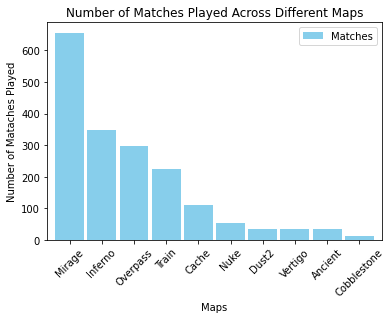

In [17]:

#Number of matches played across different maps
Maps_Stats_df_emil.plot.bar(y = "Matches", color = "skyblue", title = 'Number of Matches Played Across Different Maps', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

plt.show()
